#Library Import

In [66]:
import imutils  # Importing the imutils library for image processing and manipulation
import os  # Importing the os module for interacting with the operating system, such as file and directory management
import cv2  # Importing the OpenCV library for computer vision tasks like reading, displaying, and modifying images
import datetime  # Importing the datetime module for working with dates and times, useful for logging and timestamping events
import numpy as np  # Importing numpy for numerical computations and handling large, multi-dimensional arrays
import zipfile  # Importing the zipfile module to handle zip files, such as extracting dataset files
from google.colab import drive  # Importing Google Colab drive module to mount Google Drive for accessing files stored there

import matplotlib.pyplot as plt  # Importing matplotlib for plotting and visualization of images and data
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting the dataset into training and testing sets

from tensorflow.keras.layers import Flatten  # Importing the Flatten layer for reshaping data in Keras, often used to convert feature maps into a vector
from tensorflow.keras.layers import Dense  # Importing the Dense layer to add fully connected layers in Keras models, commonly used in neural networks
from tensorflow.keras.layers import Input  # Importing the Input layer for defining the input shape of the model in Keras
from tensorflow.keras.models import Model  # Importing the Model class for defining custom models in Keras using functional API
from tensorflow.keras.optimizers import Adam  # Importing the Adam optimizer for training Keras models, known for adaptive learning rates
from tensorflow.keras.preprocessing.image import img_to_array  # Importing the img_to_array function to convert loaded images to numpy arrays in Keras
from tensorflow.keras.preprocessing.image import load_img  # Importing the load_img function for loading and resizing images for Keras models
from tensorflow.keras.models import load_model  # Importing the load_model function to load saved models from disk for inference or further training
from tensorflow.keras.applications import VGG16  # Importing the VGG16 model architecture from Keras for transfer learning, using pre-trained weights
from tensorflow.keras.layers import Dropout  # Importing the Dropout layer for regularization in Keras to prevent overfitting by randomly dropping neurons during training
from tensorflow.keras.utils import to_categorical  # Importing the to_categorical function to convert labels to one-hot encoded format, useful for classification tasks

from sklearn.preprocessing import LabelBinarizer  # Importing the LabelBinarizer class to convert categorical labels into a binary matrix (one-hot encoding) using scikit-learn

import pickle  # Importing the pickle module for working with serialized objects, such as saving and loading LabelBinarizer and other model-related data

# Detailed Explanation for Each Block of Code:
# `import imutils`: A utility library that provides a collection of functions for basic image processing tasks, such as resizing, rotating, and displaying images.
# It simplifies working with OpenCV.

# `import os`: The `os` module is used for interacting with the operating system, such as navigating file directories, creating directories, and managing file paths.
# It is essential for loading and saving files throughout the project.

# `import cv2`: OpenCV (`cv2`) is a popular library for computer vision. It is used for reading images, manipulating them (e.g., resizing, filtering),
# and performing image-related tasks such as drawing bounding boxes.

# `import datetime`: This module is used for working with dates and times, which is useful for logging, tracking the time taken for tasks,
# and adding timestamps for saved models or log files.

# `import numpy as np`: NumPy is the fundamental package for scientific computing with Python.
# It is used for creating and manipulating arrays, especially useful when working with image data (which is represented as arrays).

# `import zipfile`: The `zipfile` module provides tools for handling zip archives. It is used for extracting datasets that come in a compressed `.zip` format.

# `from google.colab import drive`: This is specific to Google Colab. It is used to mount Google Drive within the Colab environment,
# allowing access to files stored in Google Drive. This is especially useful when working with datasets and saving models.

# `import matplotlib.pyplot as plt`: `matplotlib` is a plotting library. `pyplot` is used for creating visualizations such as line plots, bar plots, and image visualizations.
# It is commonly used for displaying images after processing.

# `from sklearn.model_selection import train_test_split`: `train_test_split` is used to split the dataset into training and testing sets.
# This is essential for training models and evaluating their performance on unseen data.

# `from tensorflow.keras.layers import Flatten`: The `Flatten` layer reshapes input data into a one-dimensional vector, which is often required before passing data to fully connected layers.
# It is commonly used after convolutional layers in CNNs.

# `from tensorflow.keras.layers import Dense`: The `Dense` layer is a fully connected layer used in neural networks. It is used to connect every input to every output,
# making it a key component in creating deep learning models.

# `from tensorflow.keras.layers import Input`: The `Input` layer defines the shape of the input to the model. It is used when building models using the Keras functional API.

# `from tensorflow.keras.models import Model`: The `Model` class is used to create a Keras model, combining inputs, layers, and outputs.
# It allows building complex models by connecting different components.

# `from tensorflow.keras.optimizers import Adam`: The `Adam` optimizer is an adaptive learning rate optimization algorithm.
# It is widely used for training deep learning models due to its efficiency and robustness.

# `from tensorflow.keras.preprocessing.image import img_to_array`: This function converts loaded images into a format (NumPy array) suitable for training deep learning models.

# `from tensorflow.keras.preprocessing.image import load_img`: This function loads an image from a file and optionally resizes it to match the input requirements of the model.

# `from tensorflow.keras.models import load_model`: This function is used to load a saved Keras model from disk, enabling continued training or inference on previously trained models.

# `from tensorflow.keras.applications import VGG16`: This imports the VGG16 model architecture. VGG16 is a pre-trained convolutional neural network commonly used for transfer learning.

# `from tensorflow.keras.layers import Dropout`: The `Dropout` layer is used to randomly drop neurons during training, which helps prevent overfitting and improve generalization.

# `from tensorflow.keras.utils import to_categorical`: This function is used to convert integer labels into one-hot encoded vectors. It is useful for classification tasks where
# output labels need to be in a categorical format.

# `from sklearn.preprocessing import LabelBinarizer`: The `LabelBinarizer` class is used for converting labels into a binary (one-hot) format.
# It is useful for preparing categorical labels for training models.

# `import pickle`: The `pickle` module is used for serializing and deserializing Python objects.
# It is used for saving and loading objects like the `LabelBinarizer` or model metadata to/from disk.


In [50]:
# Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Data Preparation for Object Detection

In [65]:
# Defining annotation and image paths
ann_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/res_"  # Path to the annotation files for each class
images_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification"  # Path to the directory containing images for training and testing

# Detailed Explanation for Each Block of Code:
# `ann_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/res_"`:
# This line sets the variable `ann_path` to the base path where annotation files for each class are located.
# Annotation files contain bounding box information for each image, which is essential for training object detection models.
# The path ends with `res_`, indicating that it will be used to construct full paths to specific annotation files by appending the class names.

# `images_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification"`:
# This line sets the `images_path` variable to the directory where all the images for training and testing are stored.
# This path will be used to load images from the dataset for preprocessing and training the model.
# By defining a specific directory path, the code can consistently locate images as needed for different classes during the training and evaluation process.

# Defining classes of interest
classes = ["butterfly", "dalmatian", "dolphin"]  # List of class names that we are interested in

# Detailed Explanation for Each Block of Code:
# `classes = ["butterfly", "dalmatian", "dolphin"]`:
# This line defines a list called `classes` that contains the names of the classes of interest.
# Each class corresponds to a specific type of object that we want to detect and classify in the dataset.
# This list is used throughout the code to load images, read annotations, and train the model specifically for these classes.



In [67]:
# Unzipping the dataset file
zip_file_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/Caltech_101_Reduced.zip"  # Path to the zip file
unzip_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/"  # Directory where the zip file will be extracted

# Detailed Explanation for Each Block of Code:
# `zip_file_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/Caltech_101_Reduced.zip"`:
# This line sets the `zip_file_path` variable to the full path of the zip file that contains the dataset to be unzipped.
# It provides the location of the compressed dataset file, named "Caltech_101_Reduced.zip".
# Defining this path ensures that the code knows exactly where to find the zip file that needs to be extracted.

# `unzip_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/"`:
# This line sets the `unzip_path` variable to the directory where the contents of the zip file will be extracted.
# The extracted dataset will be stored in this folder, making it ready for further processing.
# Specifying this target directory is important to ensure that the dataset is organized in the expected location for subsequent image processing tasks.
# If this directory doesn't exist, it will be created later before extracting the files.



In [68]:
# Create target directory if it doesn't exist
os.makedirs(unzip_path, exist_ok=True)  # Ensure the extraction path exists by creating the directory if needed

# Detailed Explanation for Each Block of Code:
# `os.makedirs(unzip_path, exist_ok=True)`:
# This line creates the directory specified by `unzip_path` if it does not already exist.
# The `os.makedirs()` function is used to create directories recursively, meaning that any parent directories that don't exist will also be created.
# The argument `exist_ok=True` ensures that no error is raised if the directory already exists, allowing the code to continue without issues.
# This step is essential to ensure that the directory where the dataset will be extracted (`unzip_path`) is available,
# preventing errors when trying to extract files or store data in a non-existent location.


In [69]:
# Unzip the file to the target location
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)  # Extracting all files from the zip to the specified path

# Detailed Explanation for Each Block of Code:
# `with zipfile.ZipFile(zip_file_path, 'r') as zip_ref`:
# This line opens the zip file specified by `zip_file_path` in read mode (`'r'`) using the `zipfile.ZipFile` class.
# `zip_file_path` should contain the full path to the zip file that needs to be unzipped.
# The `with` statement is used to ensure proper handling of the zip file — it guarantees that the file is automatically closed after its contents are processed.
# The `zip_ref` variable is a reference to the opened zip file and allows access to its contents for extraction.

# `zip_ref.extractall(unzip_path)`:
# This line extracts all files from the opened zip file (`zip_ref`) to the directory specified by `unzip_path`.
# `unzip_path` is the target location where the extracted contents of the zip file will be saved.
# Using `extractall()` ensures that all files and folders within the zip file are extracted to the target path, maintaining the directory structure if present.
# This process is necessary to make the dataset available in a usable format for subsequent image loading and preprocessing.


In [70]:
# Print a success message after extraction
print(f"[INFO] Files have been successfully extracted to {unzip_path}")  # Inform the user that the extraction process has completed successfully

# Detailed Explanation for Each Block of Code:
# `print(f"[INFO] Files have been successfully extracted to {unzip_path}")`:
# This line prints an informational message to the console to notify the user that all files have been successfully extracted to the specified path.
# The `{unzip_path}` is a variable that dynamically inserts the actual path where the files were extracted.
# Using `[INFO]` as a prefix helps in differentiating log messages and makes the output more organized, especially when there are multiple log messages in the script.
# Providing such messages is useful for tracking the progress of the script, confirming that specific steps were executed without issues.


[INFO] Files have been successfully extracted to /content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/


In [54]:
# Set the image directory path
data_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/"  # Path where training images are stored

# Detailed Explanation for Each Block of Code:
# `data_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/"`
# This line defines the directory path where the dataset's training images are located.
# The `data_path` variable points to the folder containing images that will be used for training and testing the model.
# It is important to have an organized structure to easily locate the images for further processing.
# In this case, the directory (`dataset_reduced/caltech101_classification/`) contains the reduced version of the Caltech 101 dataset.
# This path will be used later in the code to load images for preprocessing, training, and evaluation tasks.



In [71]:
# Initializing variables
image_data = []  # This will store image arrays after loading and preprocessing images.
labels = []  # This will store the corresponding labels (class names) of each image.
bboxes = []  # This will store bounding box coordinates for each image for object detection tasks.
imagePaths = []  # This will store the file paths of the images in the dataset.

# Detailed Explanation for Each Block of Code:
# `image_data = []`: This initializes an empty list called `image_data` that will be used to store the image arrays.
# After each image is loaded and preprocessed (resized, normalized, etc.), it will be appended to this list.
# This list is crucial for storing the input data that will be fed into the model for training or evaluation.

# `labels = []`: This initializes an empty list called `labels` to store the class labels for each image.
# Each label represents the category to which the corresponding image belongs (e.g., cat, dog, car).
# The labels will be used by the model to learn to classify the images correctly during training.

# `bboxes = []`: This initializes an empty list called `bboxes` to store bounding box coordinates for each image.
# Bounding boxes are used in object detection tasks to locate specific objects within an image.
# Each bounding box is defined by coordinates that mark the area where the object is located.
# These coordinates will be used during training to teach the model to identify and localize objects.

# `imagePaths = []`: This initializes an empty list called `imagePaths` that will store the file paths for each image in the dataset.
# Storing image paths helps in keeping track of where each image is located on disk, which is useful for loading and referencing the images as needed.
# Having the paths also makes it easier to debug and process specific images, if necessary.



In [ ]:
# Unzipping the dataset file
zip_file_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/Caltech_101_Reduced.zip"  # Path to the zip file
unzip_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/"  # Directory where the zip file will be extracted

# Create target directory if it doesn't exist
os.makedirs(unzip_path, exist_ok=True)  # Ensure the extraction path exists

# Detailed Explanation for Each Block of Code:
# `os.makedirs(unzip_path, exist_ok=True)`: This line creates the target directory (`unzip_path`) if it does not already exist.
# `exist_ok=True` ensures that if the directory already exists, no error will be raised.
# This step ensures that the target extraction path is available to store the unzipped dataset files.

# Unzip the file to the target location
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)  # Extracting all files from the zip to the specified path

# Detailed Explanation for Each Block of Code:
# `with zipfile.ZipFile(zip_file_path, 'r') as zip_ref`: Opens the zip file specified by `zip_file_path` in read mode (`'r'`).
# `zip_ref.extractall(unzip_path)`: Extracts all contents of the zip file to the directory specified by `unzip_path`.
# Using a `with` statement ensures that the file is properly closed after extraction.

print(f"[INFO] Files have been successfully extracted to {unzip_path}")  # Print a success message after extraction

# Set the image directory path
data_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/"  # Path where training images are stored

# Initializing variables
image_data = []  # This will store image arrays
labels = []  # This will store the corresponding labels of each image
bboxes = []  # This will store bounding box coordinates for object detection
imagePaths = []  # This will store the paths of images

# Detailed Explanation for Each Block of Code:
# `data_path = ...`: Defines the directory path where the training images are located.
# `image_data = []`, `labels = []`, `bboxes = []`, `imagePaths = []`: Initialize empty lists to store data.
# `image_data`: Stores the image arrays after loading and preprocessing.
# `labels`: Stores the class labels for each image.
# `bboxes`: Stores the bounding box coordinates for object detection.
# `imagePaths`: Stores the paths to each image in the dataset.

# Loading and processing images from the dataset
print("[INFO] Loading images from dataset...")  # Print information that the images are being loaded

# Loop through each class in the dataset
for cl in classes:
    ann_path_new = ann_path + cl + ".txt"  # Construct the path to the annotation file for the current class
    print(ann_path_new)  # Print the path to the annotation file for verification
    rows = open(ann_path_new).read().strip().split("\n")  # Read the annotation file and split it into rows, each containing data for an image

    # Detailed Explanation for Each Block of Code:
    # `ann_path_new = ann_path + cl + ".txt"`: Constructs the complete path to the annotation file for the current class.
    # The annotation file contains bounding box coordinates for each image.
    # `rows = open(ann_path_new).read().strip().split("\n")`: Opens the annotation file, reads its contents, and splits it into rows.
    # Each row represents data for an image, including the image filename and bounding box coordinates.

    # Loop over each row in the annotation file
    for idx, row in enumerate(rows):
        # Split the row into filename and bounding box coordinates
        row = row.split(",")

        filename = row[0]  # The first element is the filename of the image
        filename = filename.split(".")[0]  # Remove the file extension from the filename
        filename = filename.split("_")[-1]  # Extract the unique identifier part of the filename
        filename = "image_" + filename + ".jpg"  # Reconstruct the filename in the desired format

        # Detailed Explanation for Each Block of Code:
        # `row = row.split(",")`: Splits each row into individual elements.
        # The first element is the filename, and the remaining elements are bounding box coordinates.
        # `filename = row[0]`: Extracts the filename of the image.
        # `filename = filename.split(".")[0]`: Removes the file extension (e.g., `.jpg`) to work with just the main part of the filename.
        # `filename = filename.split("_")[-1]`: Extracts the unique identifier from the filename.
        # `filename = "image_" + filename + ".jpg"`: Reconstructs the filename to match the expected format.

        # Extract bounding box coordinates from the row and convert them to integers
        coords = row[1:]  # The remaining elements are the bounding box coordinates
        coords = [int(c) for c in coords]  # Convert the coordinates from strings to integers

        # Detailed Explanation for Each Block of Code:
        # `coords = row[1:]`: Extracts the bounding box coordinates from the row.
        # `coords = [int(c) for c in coords]`: Converts the coordinates from strings to integers to use them for computations.

        label = cl  # Set the label for the current image to the current class name

        # Construct the full path to the image file
        image_path = os.path.sep.join([images_path, cl, filename])

        # Detailed Explanation for Each Block of Code:
        # `label = cl`: Sets the label of the current image to the class name (`cl`).
        # `image_path = os.path.sep.join([images_path, cl, filename])`: Constructs the full path to the image by joining the directory path, class folder, and filename.

        # Load the image using OpenCV
        image = cv2.imread(image_path)
        (h, w) = image.shape[:2]  # Get the height and width of the image

        # Detailed Explanation for Each Block of Code:
        # `image = cv2.imread(image_path)`: Loads the image from the specified path using OpenCV.
        # `(h, w) = image.shape[:2]`: Extracts the height and width dimensions of the loaded image.

        # Scale the bounding box coordinates relative to the dimensions of the input image
        Xmin = float(coords[0]) / w  # Normalize the x-coordinate of the top-left corner
        Ymin = float(coords[1]) / h  # Normalize the y-coordinate of the top-left corner
        Xmax = float(coords[2]) / w  # Normalize the x-coordinate of the bottom-right corner
        Ymax = float(coords[3]) / h  # Normalize the y-coordinate of the bottom-right corner

        # Detailed Explanation for Each Block of Code:
        # `Xmin = float(coords[0]) / w`, etc.: Normalize each coordinate to fall between 0 and 1 by dividing by the image width or height.
        # Normalization ensures that the bounding box coordinates are relative, which makes them easier to work with regardless of the original image size.

        # Load the image using Keras and resize it to the target size of 224x224 pixels
        image = load_img(image_path, target_size=(224, 224))
        image = img_to_array(image)  # Convert the image to a numpy array for further processing

        # Detailed Explanation for Each Block of Code:
        # `load_img(image_path, target_size=(224, 224))`: Loads the image using Keras and resizes it to the required input size for the model (224x224).
        # `img_to_array(image)`: Converts the image to a NumPy array for numerical operations in the model.

        # Append the processed data to their respective lists
        image_data.append(image)  # Add the image array to the list of image data
        labels.append(label)  # Add the label to the list of labels
        bboxes.append((Xmin, Ymin, Xmax, Ymax))  # Add the normalized bounding box coordinates to the list of bounding boxes
        imagePaths.append(image_path)  # Add the image path to the list of image paths

        # Detailed Explanation for Each Block of Code:
        # `image_data.append(image)`: Adds the processed image array to `image_data`.
        # `labels.append(label)`: Adds the class label to `labels`.
        # `bboxes.append((Xmin, Ymin, Xmax, Ymax))`: Adds the normalized bounding box coordinates to `bboxes`.
        # `imagePaths.append(image_path)`: Adds the image path to `imagePaths`.
        # These lists are essential for training, where the image data, labels, bounding boxes, and paths will be used for training and evaluation.


In [74]:
# Unzipping the dataset file
zip_file_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/Caltech_101_Reduced.zip"  # Path to the zip file
unzip_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/"  # Directory where the zip file will be extracted

# Create target directory if it doesn't exist
os.makedirs(unzip_path, exist_ok=True)  # Ensure the extraction path exists

# Unzip the file to the target location
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)  # Extracting all files from the zip to the specified path

print(f"[INFO] Files have been successfully extracted to {unzip_path}")

# Set the image directory path
data_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/"  # Path where training images are stored

# Initializing variables
image_data = []  # This will store image arrays
labels = []  # This will store the corresponding labels of each image
bboxes = []  # This will store bounding box coordinates for object detection
imagePaths = []  # This will store the paths of images

# Loading and processing images from the dataset
print("[INFO] Loading images from dataset...")
for cl in classes:
    ann_path_new = ann_path + cl + ".txt"  # Construct the path to the annotation file for the current class
    print(ann_path_new)  # Print the path to the annotation file for verification
    rows = open(ann_path_new).read().strip().split("\n")  # Read the annotation file and split it into rows, each containing data for an image

    # Loop over each row in the annotation file
    for idx, row in enumerate(rows):
        # Split the row into filename and bounding box coordinates
        row = row.split(",")

        filename = row[0]  # The first element is the filename of the image
        filename = filename.split(".")[0]  # Remove the file extension from the filename
        filename = filename.split("_")[-1]  # Extract the unique identifier part of the filename
        filename = "image_" + filename + ".jpg"  # Reconstruct the filename in the desired format

        # Extract bounding box coordinates from the row and convert them to integers
        coords = row[1:]  # The remaining elements are the bounding box coordinates
        coords = [int(c) for c in coords]  # Convert the coordinates from strings to integers

        label = cl  # Set the label for the current image to the current class name

        # Construct the full path to the image file
        image_path = os.path.sep.join([images_path, cl, filename])

        # Load the image using OpenCV
        image = cv2.imread(image_path)
        (h, w) = image.shape[:2]  # Get the height and width of the image

        # Scale the bounding box coordinates relative to the dimensions of the input image
        Xmin = float(coords[0]) / w  # Normalize the x-coordinate of the top-left corner
        Ymin = float(coords[1]) / h  # Normalize the y-coordinate of the top-left corner
        Xmax = float(coords[2]) / w  # Normalize the x-coordinate of the bottom-right corner
        Ymax = float(coords[3]) / h  # Normalize the y-coordinate of the bottom-right corner

        # Load the image using Keras and resize it to the target size of 224x224 pixels
        image = load_img(image_path, target_size=(224, 224))
        image = img_to_array(image)  # Convert the image to a numpy array for further processing

        # Append the processed data to their respective lists
        image_data.append(image)  # Add the image array to the list of image data
        labels.append(label)  # Add the label to the list of labels
        bboxes.append((Xmin, Ymin, Xmax, Ymax))  # Add the normalized bounding box coordinates to the list of bounding boxes
        imagePaths.append(image_path)  # Add the image path to the list of image paths

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Files have been successfully extracted to /content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/
[INFO] Loading images from dataset...
/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/res_butterfly.txt
/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/res_dalmatian.txt
/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/dataset_reduced/caltech101_classification/res_dolphin.txt


The above cells in the code read in annotations for a dataset of images from the Caltech101 dataset, specifically for the classes "butterfly", "dalmatian", and "dolphin". The annotations contain the coordinates of the bounding boxes for objects in each image, and the code processes each row of the annotation file to extract the filename, bounding box coordinates, and label for each object.

The code then loads the corresponding image file, scales the bounding box coordinates relative to the dimensions of the input image, and resizes the image to a target size of 224x224 pixels. The image data, label, and bounding box coordinates are then appended to lists for later use in a machine learning model.

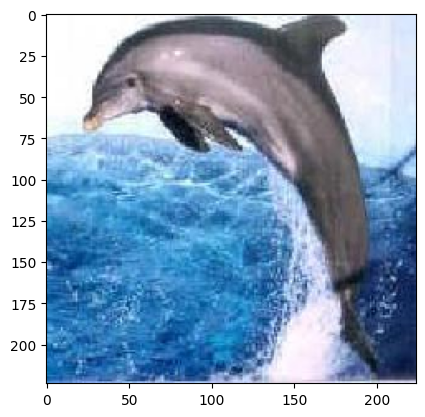

In [75]:
# Show the output image
imgplot = plt.imshow(image.astype('uint8'))  # Convert the image to unsigned 8-bit integers and display it using matplotlib.
plt.show()  # Display the image.

# Detailed Explanation for Each Block of Code:
# `imgplot = plt.imshow(image.astype('uint8'))`
# This line displays the image using `matplotlib`.
# `plt.imshow()` is used to plot the image, and `image.astype('uint8')` converts the data type of the image to unsigned 8-bit integers (ranging from 0 to 255).
# The `uint8` data type is the standard format for image data, as it represents pixel values correctly for displaying.
# Converting to `uint8` ensures that matplotlib interprets the pixel values correctly for proper visualization.

# `plt.show()`
# This line actually renders the image and displays it in the output.
# It is necessary to call `plt.show()` after plotting an image or a graph to display the figure to the user.
# Without this line, the image would not be shown, and the figure would just be created in the background.


In [77]:
# Convert image data from the range [0, 255] to [0, 1] by normalizing the values
image_data = np.array(image_data, dtype="float32") / 255.0  # Normalizing image data to the range [0, 1]

# Detailed Explanation for Each Block of Code:
# `image_data = np.array(image_data, dtype="float32") / 255.0`
# This line converts the list of images (`image_data`) into a NumPy array with data type `float32`.
# Image pixel values originally range from [0, 255]. By dividing each value by 255, they are normalized to the range [0, 1].
# Normalization helps the model to train faster and achieve better performance, as it makes all features comparable and keeps the values small, which prevents large gradients.
# This is a standard preprocessing step for neural networks when working with image data.

# Convert labels, bounding boxes, and image paths to numpy arrays
labels = np.array(labels)  # Converting labels list to numpy array
bboxes = np.array(bboxes, dtype="float32")  # Converting bounding box list to numpy array
imagePaths = np.array(imagePaths)  # Converting image paths list to numpy array

# Detailed Explanation for Each Block of Code:
# `labels = np.array(labels)`
# This line converts the `labels` list into a NumPy array.
# Converting lists to NumPy arrays makes them easier to work with in mathematical computations, as NumPy is optimized for numerical operations.
# The labels are class labels for each image, and converting them into an array is useful for model training.

# `bboxes = np.array(bboxes, dtype="float32")`
# This line converts the `bboxes` (bounding boxes) list into a NumPy array of type `float32`.
# The bounding boxes contain coordinates that indicate where objects are located in the images.
# Converting them to a NumPy array allows for efficient manipulation and use in training the model.

# `imagePaths = np.array(imagePaths)`
# This line converts the `imagePaths` list into a NumPy array.
# The `imagePaths` list contains file paths to each image. Converting these paths into an array allows for easier indexing and access when processing the images.
# While the actual paths are strings, the conversion to a NumPy array makes operations such as shuffling or splitting into training and testing sets easier and faster.


In [78]:
labels

array(['butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalm

In [79]:
# One-hot encoding on the labels
lb = LabelBinarizer()  # Creating an instance of LabelBinarizer
labels = lb.fit_transform(labels)  # Converting categorical labels into binary format
if len(lb.classes_) == 2:
    print("two classes")  # Print message if there are only two classes
    labels = to_categorical(labels)  # Convert labels to one-hot encoding if there are two classes

In [80]:
labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

#2.Model Preparation

In [81]:
# Splitting the dataset into 80% training and 20% testing
split = train_test_split(image_data, labels, bboxes, imagePaths, test_size=0.2, random_state=42)  # Split data into training and testing sets

# Detailed Explanation for Each Block of Code:
# `split = train_test_split(image_data, labels, bboxes, imagePaths, test_size=0.2, random_state=42)`:
# This line uses the `train_test_split` function from scikit-learn to split the dataset into training and testing sets.
# - `image_data, labels, bboxes, imagePaths`: These are the inputs that are being split. They include:
#   - `image_data`: The images (in array form) that will be used for training and testing.
#   - `labels`: The class labels corresponding to each image.
#   - `bboxes`: The bounding box coordinates for each image (used for object localization).
#   - `imagePaths`: The file paths to each image, which help in identifying each image.
# - `test_size=0.2`: This argument specifies that 20% of the dataset will be used for testing, while 80% will be used for training.
#   Using 80% of the data for training allows the model to learn effectively, while 20% of the data is kept for evaluating the model's performance on unseen data.
# - `random_state=42`: Setting `random_state` to a fixed value ensures that the split is reproducible.
#   This means that every time the code is run, the data will be split in the same way, which is helpful for consistency in training and testing results.
# The result of this function is a split of all input arrays into training and testing portions, ensuring that all related data is divided consistently.


In [82]:
# Unpack the data split
(trainImages, testImages) = split[:2]  # Splitting the image data into training and testing
(trainLabels, testLabels) = split[2:4]  # Splitting the labels into training and testing
(trainBBoxes, testBBoxes) = split[4:6]  # Splitting the bounding box data into training and testing
(trainPaths, testPaths) = split[6:]  # Splitting the image paths into training and testing

# Detailed Explanation for Each Block of Code:
# (trainImages, testImages) = split[:2]
# This line splits the image data into training and testing sets.
# `split[:2]` extracts the first two elements from the list `split`, assuming that the first two items in `split` are the image arrays for training and testing.
# The result is two variables: `trainImages` containing the training images and `testImages` containing the test images.

# (trainLabels, testLabels) = split[2:4]
# This line splits the labels (or class labels) into training and testing sets.
# `split[2:4]` extracts the third and fourth elements from the list `split`.
# The first element in this range (`trainLabels`) represents the class labels for the training images, while the second (`testLabels`) represents the labels for the testing images.
# This ensures that you have separate class label data to match the training and test image sets.

# (trainBBoxes, testBBoxes) = split[4:6]
# This line splits the bounding box data into training and testing sets.
# `split[4:6]` extracts the fifth and sixth elements from the list `split`.
# `trainBBoxes` contains the bounding box coordinates for the training images, while `testBBoxes` contains the bounding box coordinates for the test images.
# This step helps ensure that you have the correct bounding box coordinates associated with each image in both the training and testing datasets.

# (trainPaths, testPaths) = split[6:]
# This line splits the image paths into training and testing sets.
# `split[6:]` extracts all elements from the seventh position onward from the list `split`.
# `trainPaths` contains the file paths of the training images, while `testPaths` contains the file paths of the testing images.
# This is useful for loading images later or keeping track of which images belong to which set.


In [87]:
# Opening a file to save test image paths
f = open("testing_multiclass.txt", "w")  # Open the file named "testing_multiclass.txt" in write mode ("w").

# Write the test image paths to the file
f.write("\n".join(testPaths))  # Write all paths from the `testPaths` list to the file, with each path on a new line.

# Closing the file
f.close()  # Close the file to ensure all data is written properly and free the file resource.

# Detailed Explanation for Each Block of Code:
# f = open("testing_multiclass.txt", "w")
# This line opens a file named "testing_multiclass.txt" in write mode (`"w"`).
# Writing mode means that the existing content in the file (if any) will be erased, and new content will be added.
# If the file does not exist, it will be created. The variable `f` is a file object used to perform operations on the file (e.g., write data).

# f.write("\n".join(testPaths))
# This line writes the contents of `testPaths` to the file.
# `"\n".join(testPaths)` concatenates all the elements in the `testPaths` list into a single string, with each element (image path) separated by a newline character (`"\n"`).
# This means that each image path in `testPaths` will be written on a new line in the file.
# This is useful for storing paths in a text file so that they can be easily read later for testing purposes.

# f.close()
# This line closes the file, ensuring that all the data is properly written to disk.
# Closing the file is an important step because it releases the resources tied to the file and prevents potential data corruption or loss.
# If `f.close()` is not called, there is a risk that the data may not be fully saved, especially if the program is interrupted before the file is automatically closed.



In [88]:
# VGG16 is a convolutional neural network (CNN) model that was introduced by the Visual Geometry Group (VGG) at the University of Oxford.
# The model has 16 layers, including 13 convolutional layers and 3 fully connected layers.
# VGG16 is a widely used pre-trained CNN model that has been trained on the large-scale ImageNet dataset, which contains millions of images.
# The pre-trained model can be used for transfer learning, which allows us to use the learned features from the ImageNet dataset and apply them to our specific task.

# Create an instance of the VGG16 Model
vgg = VGG16(weights="imagenet",
            include_top=False,
            input_tensor=Input(shape=(224, 224, 3)))

# Detailed Explanation for Each Block of Code:
# vgg = VGG16(weights="imagenet",
#             include_top=False,
#             input_tensor=Input(shape=(224, 224, 3)))
# `VGG16(weights="imagenet")`: This creates an instance of the VGG16 model. By specifying `weights="imagenet"`, we are using the pre-trained weights from the ImageNet dataset.
# The model has been pre-trained on millions of images and is therefore capable of recognizing a wide range of features.
# This makes it a popular model for transfer learning, as we can leverage these learned features for our own image classification or object detection tasks.

# `include_top=False`: This argument is used to exclude the fully connected (classification) layers at the top of the VGG16 model.
# By excluding the top layers, we obtain only the convolutional base of VGG16, which allows us to use it as a feature extractor.
# This is especially useful if we want to add our own custom classification layers tailored to our specific dataset and task.

# `input_tensor=Input(shape=(224, 224, 3))`: This specifies the input shape of the images that will be fed into the VGG16 model.
# `Input(shape=(224, 224, 3))` defines the input tensor as an image with a shape of 224x224 pixels and 3 color channels (RGB).
# This matches the input size required by VGG16, allowing us to use it effectively as part of our pipeline.



In [89]:
# Getting the output of the VGG16 base model and flattening it for fully connected layers
flatten = vgg.output  # Getting the output of the VGG16 base model
flatten = Flatten()(flatten)  # Flattening the output to make it suitable for the fully connected layers

# Detailed Explanation for Each Block of Code:
# `flatten = vgg.output`:
# This line assigns the output of the pre-trained VGG16 model (`vgg`) to the variable `flatten`.
# The `vgg` model contains multiple convolutional and pooling layers, and `vgg.output` represents the output tensor produced by these layers.
# This output will be used as input for the additional layers we will add on top of the model.
# It acts as the feature map generated by the convolutional layers, which captures important features from the images.

# `flatten = Flatten()(flatten)`:
# This line applies the `Flatten` layer to the output of the VGG16 model.
# The `Flatten` layer reshapes the multi-dimensional feature map produced by the convolutional base into a one-dimensional vector.
# Flattening is required before feeding the output into fully connected (dense) layers, as dense layers require one-dimensional input.
# The purpose of flattening is to prepare the output of the convolutional layers for the fully connected part of the model, which will be used for classification or regression.


In [90]:
# Construct a fully-connected layer header to output the predicted bounding box coordinates
bboxHead = Dense(128, activation="relu")(flatten)  # First dense layer with 128 neurons and ReLU activation
bboxHead = Dense(64, activation="relu")(bboxHead)  # Second dense layer with 64 neurons and ReLU activation
bboxHead = Dense(32, activation="relu")(bboxHead)  # Third dense layer with 32 neurons and ReLU activation
bboxHead = Dense(4, name="bounding_box")(bboxHead)  # Output layer for the bounding box coordinates (4 values)

# Detailed Explanation for Each Block of Code:
# `bboxHead = Dense(128, activation="relu")(flatten)`:
# This line adds the first fully connected (dense) layer to the network with 128 neurons.
# The `activation="relu"` specifies that the ReLU (Rectified Linear Unit) activation function will be used.
# ReLU is commonly used in hidden layers because it helps in dealing with the vanishing gradient problem and introduces non-linearity.
# The input to this layer is the `flatten` layer, which contains the flattened feature map from the VGG16 model.
# This layer will learn complex features from the input feature map to be used in predicting bounding box coordinates.

# `bboxHead = Dense(64, activation="relu")(bboxHead)`:
# This line adds the second fully connected layer with 64 neurons, also using the ReLU activation function.
# This layer takes the output from the previous dense layer (`bboxHead`) and further learns features required for predicting bounding boxes.
# The reduction in the number of neurons helps in learning more specific features and reducing model complexity to prevent overfitting.

# `bboxHead = Dense(32, activation="relu")(bboxHead)`:
# This line adds the third fully connected layer with 32 neurons, continuing to refine the features extracted from the previous layer.
# ReLU activation is used to introduce non-linearity.
# The smaller number of neurons helps in reducing the dimensionality while retaining essential information needed for bounding box prediction.

# `bboxHead = Dense(4, name="bounding_box")(bboxHead)`:
# This line adds the output layer for the bounding box coordinates, with 4 neurons representing the bounding box values: `(Xmin, Ymin, Xmax, Ymax)`.
# No activation function is specified, meaning the output is linear, which is typical for regression tasks like predicting bounding box coordinates.
# The layer is named `"bounding_box"` for easier identification when working with multiple outputs or during model training.



In [91]:
# Construct a second fully-connected layer header to predict the class label
softmaxHead = Dense(512, activation="relu")(flatten)  # First dense layer with 512 neurons and ReLU activation for class prediction
softmaxHead = Dropout(0.5)(softmaxHead)  # Adding Dropout for regularization
softmaxHead = Dense(512, activation="relu")(softmaxHead)  # Second dense layer with 512 neurons and ReLU activation
softmaxHead = Dropout(0.5)(softmaxHead)  # Adding Dropout for regularization
softmaxHead = Dense(len(lb.classes_), activation="softmax", name="class_label")(softmaxHead)  # Output layer for class prediction with softmax activation

# Detailed Explanation for Each Block of Code:
# `softmaxHead = Dense(512, activation="relu")(flatten)`:
# This line adds the first fully connected (dense) layer to the classification head with 512 neurons.
# The `activation="relu"` specifies that the ReLU activation function will be used.
# The input to this layer is the `flatten` layer, which contains the flattened feature map from the VGG16 model.
# This layer aims to learn high-level features required for classifying the input images into specific categories.

# `softmaxHead = Dropout(0.5)(softmaxHead)`:
# This line adds a `Dropout` layer with a dropout rate of `0.5` (50%).
# Dropout is a regularization technique that randomly drops neurons during training to prevent overfitting.
# By setting `0.5`, half of the neurons are randomly set to zero during each forward pass, promoting generalization.

# `softmaxHead = Dense(512, activation="relu")(softmaxHead)`:
# This line adds the second fully connected layer to the classification head, again with 512 neurons and ReLU activation.
# This layer refines the features learned by the first dense layer, contributing to the model's ability to classify images correctly.
# Repeating the dense layer helps in capturing complex relationships between the features learned from the base VGG16 model.

# `softmaxHead = Dropout(0.5)(softmaxHead)`:
# This line adds another `Dropout` layer with a dropout rate of `0.5` after the second dense layer.
# This additional dropout further helps to regularize the model and reduce overfitting by ensuring that the model does not rely too heavily on certain neurons during training.

# `softmaxHead = Dense(len(lb.classes_), activation="softmax", name="class_label")(softmaxHead)`:
# This line adds the output layer for the class label prediction.
# `Dense(len(lb.classes_))` defines the number of neurons equal to the number of classes in the dataset (`len(lb.classes_)`).
# `activation="softmax"` specifies the use of the softmax activation function, which is commonly used for classification tasks to convert the output into probabilities.
# The output layer assigns probabilities to each class, and the predicted class is the one with the highest probability.
# The layer is named `"class_label"` to make it easy to reference when working with multi-output models or during model training.


In [92]:
# Defining the final model
model = Model(inputs=vgg.input, outputs=[bboxHead, softmaxHead])  # Defining the model with VGG16 input and two output heads

# Detailed Explanation for Each Block of Code:
# `model = Model(inputs=vgg.input, outputs=[bboxHead, softmaxHead])`:
# This line defines the final model using the Keras `Model` class.
# - `inputs=vgg.input`: The input to the model is defined as the input to the VGG16 base model (`vgg.input`).
#   This means that the VGG16 pre-trained model will process the input images, extracting relevant features through its convolutional layers.
# - `outputs=[bboxHead, softmaxHead]`: The model has two outputs — `bboxHead` and `softmaxHead`.
#   - `bboxHead`: The output head responsible for predicting the bounding box coordinates of objects in the input images.
#   - `softmaxHead`: The output head responsible for predicting the class label of the object in the input image.
# By defining the model with two outputs, it becomes a multi-task learning model, which means it can simultaneously perform both object detection (bounding box regression) and classification tasks.
# Using a shared feature extraction base (VGG16) allows the model to learn more efficiently since the features learned by the convolutional layers are useful for both tasks.


In [93]:
# Initial learning rate, number of epochs, and batch size
INIT_LR = 1e-4  # Initial learning rate for the Adam optimizer
NUM_EPOCHS = 15  # Number of epochs to train the model
BATCH_SIZE = 32  # Batch size for training

# Detailed Explanation for Each Block of Code:
# `INIT_LR = 1e-4`:
# This line defines the initial learning rate (`INIT_LR`) for the Adam optimizer.
# The learning rate controls how much the model's weights are adjusted in response to the estimated error at each update step.
# A value of `1e-4` (0.0001) is commonly used as it strikes a balance between convergence speed and model stability.
# Setting it too high can make the model's training process unstable, while setting it too low can make training very slow.

# `NUM_EPOCHS = 15`:
# This line defines the number of epochs (`NUM_EPOCHS`) for training the model.
# An epoch represents one complete pass through the entire training dataset.
# Setting `NUM_EPOCHS` to `15` means the model will see the entire dataset 15 times during training.
# The number of epochs is a hyperparameter that needs to be tuned — too few may result in underfitting, while too many may result in overfitting.

# `BATCH_SIZE = 32`:
# This line defines the batch size (`BATCH_SIZE`) for training the model.
# The batch size determines how many samples are processed before the model’s weights are updated.
# A `BATCH_SIZE` of `32` means the model will process 32 samples at a time and then update its weights.
# A larger batch size can speed up training, but it requires more memory, while a smaller batch size can provide more accurate updates but may take longer.


In [94]:
# Define the losses for each output head
losses = {
    "class_label": "categorical_crossentropy",  # Loss function for class label prediction
    "bounding_box": "mean_squared_error"  # Loss function for bounding box regression
}

# Detailed Explanation for Each Block of Code:
# `losses = {}`:
# This line defines a dictionary named `losses` that specifies the loss functions for each output of the multi-task model.
# In multi-task learning, different output heads can have different objectives, and thus require different loss functions to optimize their performance.

# `"class_label": "categorical_crossentropy"`:
# This specifies the loss function for the `"class_label"` output head.
# The `"categorical_crossentropy"` loss function is used for classification tasks where the output is a probability distribution over multiple categories.
# It measures the difference between the predicted probabilities and the true one-hot encoded labels, making it suitable for multi-class classification problems.
# It helps the model learn to output the correct class probabilities for each input image.

# `"bounding_box": "mean_squared_error"`:
# This specifies the loss function for the `"bounding_box"` output head.
# `"mean_squared_error"` (MSE) is used as the loss function for regression tasks, where the goal is to predict continuous values.
# For bounding box regression, MSE calculates the average of the squared differences between the predicted bounding box coordinates and the actual coordinates.
# It helps minimize the distance between the predicted bounding box and the ground truth, improving the accuracy of the object localization.


In [95]:
# Define the loss weights for each output head
lossWeights = {
    "class_label": 1.0,  # Weight for the class label loss
    "bounding_box": 1.0  # Weight for the bounding box loss
}

# Detailed Explanation for Each Block of Code:
# `lossWeights = {}`:
# This line defines a dictionary named `lossWeights` that specifies the relative importance (or weight) of each loss function in the multi-task model.
# In a multi-output model, each output has its own loss function, and these loss functions can be combined during training.
# The weights assigned to each output control how much influence each task has on the total loss during training.

# `"class_label": 1.0`:
# This specifies the weight for the `"class_label"` loss function.
# A weight of `1.0` means that the loss from the class label prediction will have a standard influence on the total loss.
# If the weight was increased, the model would prioritize minimizing the classification loss more than other losses.
# In this case, setting it to `1.0` gives equal importance to the classification task.

# `"bounding_box": 1.0`:
# This specifies the weight for the `"bounding_box"` loss function.
# Similarly, a weight of `1.0` means that the bounding box regression loss will have a standard influence on the total loss.
# By assigning a weight of `1.0`, the model is given equal priority to minimize both the classification and the bounding box regression losses.
# This balanced approach is typically used to ensure that both tasks receive equal attention during training.
# These weights can be adjusted if one task is deemed more important or challenging compared to the other, allowing the model to focus more on minimizing that particular loss.


In [96]:
# Define metrics for each output head
METRICS = {
    "class_label": "accuracy",  # Accuracy for class label prediction
    "bounding_box": "accuracy"  # Accuracy metric for bounding box (not very informative but used here)
}

# Detailed Explanation for Each Block of Code:
# `METRICS = {}`:
# This line defines a dictionary named `METRICS` that specifies the evaluation metrics for each output of the multi-task model.
# Metrics are used to evaluate the performance of the model during training and validation, providing insights into how well the model is learning.

# `"class_label": "accuracy"`:
# This specifies that `"accuracy"` will be used as the evaluation metric for the `"class_label"` output head.
# `accuracy` is a common metric for classification tasks and measures how often the model correctly predicts the class label for input images.
# It is particularly useful in cases where class distribution is balanced and provides a straightforward interpretation of the model's success in classification.

# `"bounding_box": "accuracy"`:
# This specifies that `"accuracy"` will be used as the evaluation metric for the `"bounding_box"` output head.
# However, using `accuracy` for bounding box regression is not very informative because bounding box prediction is a continuous regression task, and accuracy is not well-suited to measure how close the predicted values are to the true values.
# A better choice for evaluating bounding box predictions would be metrics like mean squared error (MSE) or intersection over union (IoU), as they give a more meaningful assessment of how well the model is predicting the bounding box coordinates.
# The use of accuracy here might be for simplicity or for keeping a placeholder, but it won't provide useful information for evaluating the quality of the bounding box predictions.



In [97]:
# Define the training targets for each output head
trainTargets = {
    "class_label": trainLabels,  # Training labels for class label prediction
    "bounding_box": trainBBoxes  # Training bounding boxes
}

# Detailed Explanation for Each Block of Code:
# `trainTargets = {}`:
# This line defines a dictionary named `trainTargets` that specifies the training data for each output head of the model.
# Since the model has multiple outputs, each output needs its corresponding target data for training.

# `"class_label": trainLabels`:
# This line sets the training labels for the `"class_label"` output head.
# `trainLabels` contains the class labels for each training image, and these labels are used by the model to learn how to classify the images into specific categories.
# The `"class_label"` key corresponds to the classification output head, which aims to predict the correct class label for each image.

# `"bounding_box": trainBBoxes`:
# This line sets the training targets for the `"bounding_box"` output head.
# `trainBBoxes` contains the bounding box coordinates for each training image, which represent the location of the object in the image.
# The `"bounding_box"` key corresponds to the bounding box regression output head, which aims to predict the four bounding box coordinates `(Xmin, Ymin, Xmax, Ymax)` for each image.
# Using `trainBBoxes` as the training targets ensures that the model learns to accurately localize the objects within the images.


In [98]:
# Define the testing targets for each output head
testTargets = {
    "class_label": testLabels,  # Testing labels for class label prediction
    "bounding_box": testBBoxes  # Testing bounding boxes
}

# Detailed Explanation for Each Block of Code:
# `testTargets = {}`:
# This line defines a dictionary named `testTargets` that specifies the testing data for each output head of the model.
# Since the model has multiple outputs, each output head requires its own corresponding target data for evaluation.

# `"class_label": testLabels`:
# This line sets the testing labels for the `"class_label"` output head.
# `testLabels` contains the class labels for each testing image, and these labels are used by the model to evaluate its classification performance.
# The `"class_label"` key corresponds to the classification output head, which aims to predict the correct class label for each test image.
# Evaluating against `testLabels` allows us to assess how well the model can classify unseen data.

# `"bounding_box": testBBoxes`:
# This line sets the testing targets for the `"bounding_box"` output head.
# `testBBoxes` contains the bounding box coordinates for each testing image, which represent the ground truth for the location of objects in the images.
# The `"bounding_box"` key corresponds to the bounding box regression output head, which aims to predict the four bounding box coordinates `(Xmin, Ymin, Xmax, Ymax)` for each image.
# Using `testBBoxes` for evaluation helps determine how accurately the model can localize objects within the images in the test set.



In [99]:
# Compile the model
opt = Adam(INIT_LR)  # Initialize the Adam optimizer with the specified learning rate
model.compile(loss=losses,  # Compile the model with the loss functions for each output head
              optimizer=opt,  # Use the Adam optimizer
              metrics=METRICS,  # Metrics to monitor during training
              loss_weights=lossWeights)  # Weights for each loss function

print(model.summary())  # Print the model summary to display the architecture

# Detailed Explanation for Each Block of Code:
# `opt = Adam(INIT_LR)`:
# This line initializes the Adam optimizer (`opt`) with the specified initial learning rate (`INIT_LR`).
# The Adam optimizer is an adaptive learning rate optimization algorithm that combines the advantages of two other optimizers — AdaGrad and RMSProp.
# It is well-suited for complex models like deep neural networks and provides efficient and stable training.
# `INIT_LR` is used to control how much the model's weights are updated with each training step.

# `model.compile(...)`:
# This line compiles the model, specifying the configurations needed to train the model.

# `loss=losses`:
# The `loss` argument specifies the loss functions for each output head of the model.
# The `losses` dictionary, defined earlier, includes `"categorical_crossentropy"` for classification (`class_label`) and `"mean_squared_error"` for bounding box regression (`bounding_box`).
# Compiling the model with these loss functions allows it to minimize the respective errors for both classification and localization tasks.

# `optimizer=opt`:
# The `optimizer` argument specifies which optimizer to use during training.
# The Adam optimizer (`opt`) helps update the weights in a way that reduces the defined losses, leading to a more accurate model.
# Using Adam ensures that the model converges efficiently with adaptive learning rates.

# `metrics=METRICS`:
# The `metrics` argument defines which metrics to monitor during training for each output head.
# The `METRICS` dictionary, defined earlier, includes `"accuracy"` for both class label prediction and bounding box output.
# Monitoring metrics provides insights into the model's performance during training and helps determine how well the model is learning.

# `loss_weights=lossWeights`:
# The `loss_weights` argument specifies how much weight each loss function should contribute to the total loss during training.
# The `lossWeights` dictionary includes weights for `"class_label"` and `"bounding_box"`, both set to `1.0` in this case, indicating equal importance for both tasks.
# These weights allow for balancing different tasks if needed, making one task more or less significant than the other during training.

# `print(model.summary())`:
# This line prints a summary of the model, including details about each layer, the shape of the inputs and outputs, and the number of trainable parameters.
# It provides an overview of the model architecture and helps in verifying the structure of the model before training begins.
# The summary is useful for understanding the complexity of the model and ensuring that all layers are properly connected.



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 224, 224, 64)   │          1,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 224, 224, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 112, 112, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 112, 112, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 112, 112, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 56, 56, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 56, 56, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 28, 28, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 28, 28, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 14, 14, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 14, 14, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 14, 14, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 31,046,311 (118.43 MB)

 Trainable params: 31,046,311 (118.43 MB)

 Non-trainable params: 0 (0.00 B)

None


In [100]:
# Training the model
H = model.fit(
    trainImages, trainTargets,  # Training images and corresponding targets
    validation_data=(testImages, testTargets),  # Validation data (testing images and targets)
    batch_size=BATCH_SIZE,  # Batch size for training
    epochs=NUM_EPOCHS,  # Number of epochs to train the model
    verbose=1  # Verbosity level (1 for progress bar)
)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 400s 80s/step - bounding_box_accuracy: 0.4187 - bounding_box_loss: 0.4056 - class_label_accuracy: 0.4632 - class_label_loss: 1.2333 - loss: 1.6416 - val_bounding_box_accuracy: 0.4103 - val_bounding_box_loss: 0.0251 - val_class_label_accuracy: 0.8205 - val_class_label_loss: 0.8390 - val_loss: 0.7865
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 441s 80s/step - bounding_box_accuracy: 0.6886 - bounding_box_loss: 0.0306 - class_label_accuracy: 0.6383 - class_label_loss: 0.9093 - loss: 0.9414 - val_bounding_box_accuracy: 0.5128 - val_bounding_box_loss: 0.0512 - val_class_label_accuracy: 0.7949 - val_class_label_loss: 0.5462 - val_loss: 0.5460
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 438s 79s/step - bounding_box_accuracy: 0.4758 - bounding_box_loss: 0.0498 - class_label_accuracy: 0.8225 - class_label_loss: 0.3676 - loss: 0.4174 - val_bounding_box_accuracy: 0.3590 - val_bounding_box_loss: 0.1106 - val_class_label_accuracy: 0.9231 - val_class_label_loss: 0.2794 - val_loss:

# 3.Bounding Box Loss

## Bounding Box Loss Visualization
 The Bounding Box Loss, also known as the Localization Loss, is a loss function used in Object Detection tasks to evaluate how well the predicted bounding boxes match the ground-truth bounding boxes.
 In Object Detection, the goal is to identify the location and class of objects within an image. A bounding box is a rectangle that encloses an object in an image.
To train a Neural Network for Object Detection, it needs to learn to predict the correct bounding box coordinates for each object in the image.

In [101]:
# Define the names of the losses to plot
lossNames = ["loss", "class_label_accuracy", "bounding_box_accuracy"]  # Names of the losses and metrics to plot

# Detailed Explanation for Each Block of Code:
# `lossNames = ["loss", "class_label_accuracy", "bounding_box_accuracy"]`:
# This line defines a list called `lossNames` that contains the names of the losses and metrics that will be plotted after training.
# - `"loss"`: This refers to the overall combined loss of the model during training.
#   It provides an indication of how well the model is optimizing across both outputs (classification and bounding box regression).
# - `"class_label_accuracy"`: This refers to the accuracy of the class label prediction head.
#   Accuracy is used to evaluate how well the model is classifying the input images into the correct categories.
# - `"bounding_box_accuracy"`: This refers to the accuracy metric for the bounding box regression head.
#   Although accuracy is not an ideal metric for evaluating regression tasks, it has been defined here for simplicity.
# The `lossNames` list is used to specify which metrics and losses will be visualized, providing a way to analyze the model's performance during and after training.


In [102]:
# Define the epochs for plotting
N = np.arange(0, NUM_EPOCHS)  # Create an array from 0 to the number of epochs

# Detailed Explanation for Each Block of Code:
# `N = np.arange(0, NUM_EPOCHS)`:
# This line creates a NumPy array named `N` that contains a sequence of numbers starting from `0` up to (but not including) `NUM_EPOCHS`.
# - `np.arange(start, stop)`: The `arange` function from the NumPy library generates an array with values starting from `start` to `stop - 1`.
# - `start=0`: Specifies that the sequence should start from `0`.
# - `stop=NUM_EPOCHS`: Specifies that the sequence should stop at `NUM_EPOCHS`, which is the total number of epochs for which the model will be trained.
# As a result, `N` contains numbers representing each epoch, which can be used when plotting metrics or losses over the course of training.
# This array is useful for creating plots that show how the model's performance changes during each epoch, allowing us to visualize the progress of the training.


In [103]:
# Set the plot style to ggplot
plt.style.use("ggplot")  # Set the style of the plot to "ggplot" for better visualization aesthetics

# Detailed Explanation for Each Block of Code:
# `plt.style.use("ggplot")`:
# This line sets the plotting style to `"ggplot"` using the `matplotlib` library.
# The `"ggplot"` style is inspired by the popular `ggplot2` package from R and provides an aesthetically pleasing appearance for plots.
# It includes features like a white grid background, distinct colors, and well-designed axis labels, making plots easier to interpret.
# Using this style helps in creating visually appealing graphs for loss and metric trends during training.
# Setting the style before plotting ensures that all subsequent plots in the script use this consistent visualization style.


In [ ]:
# Create subplots for the different metrics and losses
(fig, ax) = plt.subplots(3, 1, figsize=(17, 25))  # 3 rows, 1 column of subplots, each with a specific figure size

# Detailed Explanation for Each Block of Code:
# `(fig, ax) = plt.subplots(3, 1, figsize=(17, 25))`:
# This line creates a figure (`fig`) with three subplots (`ax`), arranged in a grid layout.
# - `plt.subplots(nrows, ncols)`: The `subplots()` function from `matplotlib.pyplot` is used to create a figure with multiple subplots.
# - `nrows=3`: Specifies that the figure should contain `3` rows of subplots.
# - `ncols=1`: Specifies that the figure should contain `1` column of subplots.
# This layout creates a vertical stack of three plots, allowing each metric or loss to have its own subplot.
# - `figsize=(17, 25)`: This argument specifies the size of the entire figure.
# The width is set to `17` and the height to `25`, which ensures that each subplot has enough space for clear visualization.
# Having separate subplots makes it easy to visualize different metrics (like loss, accuracy for classification, and accuracy for bounding box) independently,
# helping to analyze model performance in detail.

In [110]:
# Loop over the loss names and plot them
for (i, l) in enumerate(lossNames):
    # Plot the loss for both the training and validation data
    title = "{}".format(l) if l != "loss" else "Total loss"  # Set title as "Total loss" if it is the main loss, else use metric name
    ax[i].set_title(title)  # Set the title of the subplot
    ax[i].set_xlabel("Epoch #")  # Label the x-axis to represent epoch numbers
    ax[i].set_ylabel("Loss/Accuracy")  # Label the y-axis as it represents either loss or accuracy
    ax[i].plot(N, H.history[l], label=l)  # Plot the training loss/accuracy over the epochs
    ax[i].plot(N, H.history["val_" + l], label="val_" + l)  # Plot the validation loss/accuracy over the epochs
    ax[i].legend()  # Add a legend to the subplot to distinguish between training and validation metrics

# Detailed Explanation for Each Block of Code:
# `for (i, l) in enumerate(lossNames):`:
# This line starts a loop that iterates over the `lossNames` list, with `i` as the index and `l` as the value (metric/loss name).
# The `enumerate()` function is used to generate both the index (`i`) and the metric name (`l`), which allows the code to access the appropriate subplot (`ax[i]`) for plotting each metric.
# The loop ensures that each metric is plotted on its own subplot.

# `title = "{}".format(l) if l != "loss" else "Total loss"`:
# This line sets the title of the subplot for each metric.
# If the current loss name (`l`) is `"loss"`, it is changed to `"Total loss"` for a more descriptive label.
# Otherwise, the title is simply the metric name (`l`).
# This helps in distinguishing between the overall combined loss and the other metrics.

# `ax[i].set_title(title)`:
# This line sets the title of the `i`-th subplot to the `title` defined earlier.
# The title helps viewers understand what is being plotted in each subplot, such as "Total loss", "class_label_accuracy", etc.

# `ax[i].set_xlabel("Epoch #")`:
# This line labels the x-axis of the `i`-th subplot with `"Epoch #"`.
# The x-axis represents the epoch numbers, allowing viewers to see how the metric changes over each training epoch.

# `ax[i].set_ylabel("Loss/Accuracy")`:
# This line labels the y-axis of the `i`-th subplot with `"Loss/Accuracy"`.
# The y-axis represents either loss or accuracy, depending on the specific metric being plotted.

# `ax[i].plot(N, H.history[l], label=l)`:
# This line plots the training data for the current metric (`l`) on the `i`-th subplo



In [106]:
# Display the plots
plt.show()  # Display the generated plots

# Detailed Explanation for Each Block of Code:
# `plt.show()`:
# This line displays the plots generated using `matplotlib`.
# After defining and creating the subplots with metrics like loss and accuracy for both training and validation data, calling `plt.show()` renders them to the screen.
# This command is necessary to actually display the figure in an interactive environment like Jupyter Notebook or when running the script in other Python environments.
# Without `plt.show()`, the plots would be created but not displayed, making this a crucial step to visualize the model's performance trends over each epoch.



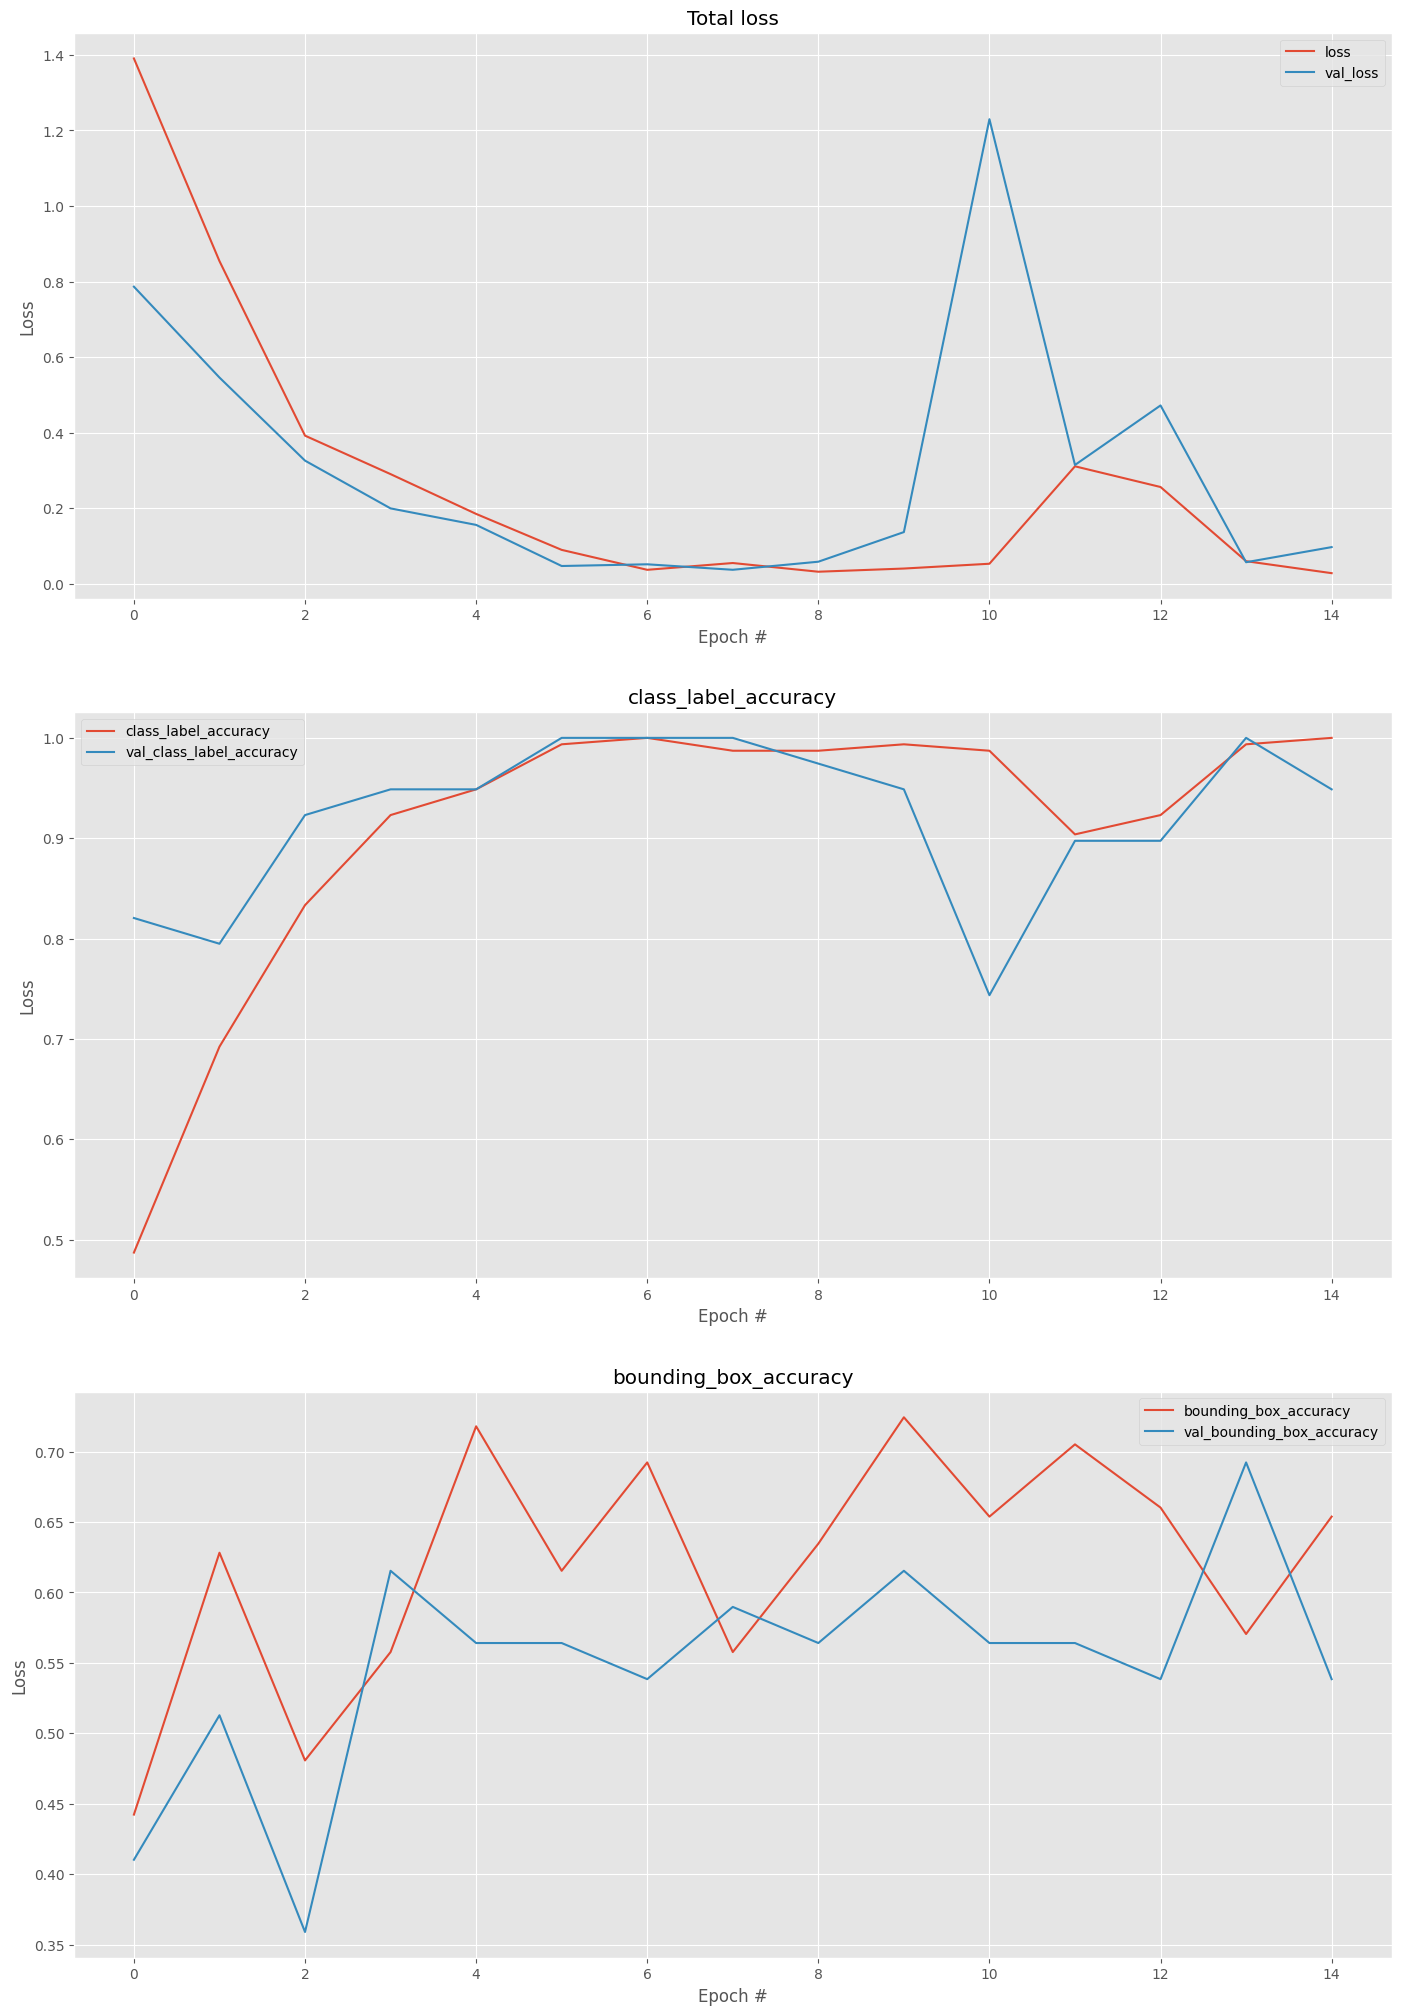

In [111]:
lossNames = ["loss",
             "class_label_accuracy",
             "bounding_box_accuracy"]

N = np.arange(0, NUM_EPOCHS)
plt.style.use("ggplot")
(fig, ax) = plt.subplots(3, 1, figsize=(17, 25))

# loop over the loss names
for (i, l) in enumerate(lossNames):
    # plot the loss for both the training and validation data
    title = "{}".format(l) if l != "loss" else "Total loss"
    ax[i].set_title(title)
    ax[i].set_xlabel("Epoch #")
    ax[i].set_ylabel("Loss")
    ax[i].plot(N, H.history[l], label=l)
    ax[i].plot(N, H.history["val_" + l], label="val_" + l)
    ax[i].legend()

- loss: The total loss, which is the sum of the classification and regression losses.
- class_label_loss: The classification loss, which measures the error in predicting the class labels.
- bounding_box_loss: The regression loss, which measures the error in predicting the bounding box coordinates.

# 4.Saving the Model and Label Binarizer

In [107]:
from tensorflow.keras.models import load_model
import pickle

# Save the trained model to disk
# The model.save() function saves the trained neural network model to a file in the Hierarchical Data Format (HDF5).
# The file is named "model_bbox_regression_and_classification" and the save path includes details of the directory structure.
model.save("/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/model_bbox_regression_and_classification.keras")

# Explanation in Detail:
# `model.save(...)`: This line saves the trained neural network to the specified path using the `.keras` file format (HDF5).
# Saving the model allows you to reuse it for predictions or further training without retraining it from scratch.

# Serialize and save the LabelBinarizer to disk
# Define the path where the LabelBinarizer should be saved.
label_binarizer_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/lb.pickle"

# Open the file in write-binary mode ("wb") to save the LabelBinarizer object.
# This LabelBinarizer is used for converting class labels to binary vectors, and is important for the training and testing phases.
with open(label_binarizer_path, "wb") as f:
    # Use pickle to serialize the LabelBinarizer object and write it to the file.
    f.write(pickle.dumps(lb))
    # The `with` block ensures the file is properly closed after writing is complete.

# Explanation in Detail:
# `label_binarizer_path = ...`: This line defines the location and name for saving the label binarizer object.
# The label binarizer is crucial because it contains the mapping between class names and binary labels that was used during training.
# `with open(label_binarizer_path, "wb") as f`: Opens a file named `lb.pickle` in write-binary mode (`"wb"`).
# The `with` block is used to ensure the file is properly closed after the data is written, preventing file corruption or data loss.
# `f.write(pickle.dumps(lb))`: This line serializes the `lb` (LabelBinarizer) object using `pickle.dumps()` and writes the resulting bytes to the file,
# preserving the state of `lb` for later use.


#5.Loading the Model and Label Binarizer

In [108]:
# Load the trained model from disk
# Define the path to the model, which matches the path used when saving the model earlier.
model_path = "/content/drive/My Drive/Professor/Monmouth_University/Fall_2024/Fall_24_DS_655_DL_CV_Wednesday/Assignment/Project_3_Object_Detection/model_bbox_regression_and_classification.keras"

# Use the load_model() function to load the trained model from the specified path.
# The model contains the saved weights, architecture, and training configuration.
model = load_model(model_path)

# Explanation in Detail:
# `model_path = ...`: Specifies the path to the saved model, matching the path used during the saving process.
# It's important to use the same path so you can correctly locate and load the model file.
# `model = load_model(model_path)`: Loads the trained model from the specified file. The loaded model contains the network's architecture, weights,
# and training configuration, enabling it to be used immediately for inference or further training.

# Load the LabelBinarizer from disk
# Open the saved LabelBinarizer file in read-binary mode ("rb") to load the serialized data.
with open(label_binarizer_path, "rb") as f:
    # Use pickle to load the LabelBinarizer from the file.
    # This step ensures the same binarizer object used during training is available for making predictions.
    lb = pickle.load(f)

# Explanation in Detail:
# `with open(label_binarizer_path, "rb") as f`: Opens the `lb.pickle` file in read-binary mode (`"rb"`).
# Again, using a `with` statement here ensures that the file is properly closed after reading.
# `lb = pickle.load(f)`: Deserializes the data from the `lb.pickle` file into the `lb` object.
# This label binarizer is crucial during prediction because it allows the model's output to be interpreted correctly based on the same classes that were used during training.


#6.Code for Displaying Bounding Boxes

In [109]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Iterate through each image path in the list of imagePaths
for imagePath in imagePaths:

    # Load the input image
    # Load the image from disk and resize it to the target size (224, 224) for the model.
    image = load_img(imagePath, target_size=(224, 224))
    # Convert the image to a NumPy array and scale pixel values to the range [0, 1].
    image = img_to_array(image) / 255.0
    # Expand the dimensions of the image to match the expected input shape of the model (1, 224, 224, 3).
    image = np.expand_dims(image, axis=0)

    # Detailed Explanation for Each Block of Code:
    # `load_img(imagePath, target_size=(224, 224))`: Loads the image from the disk and resizes it to 224x224 pixels, which is the input size expected by the model.
    # `img_to_array(image) / 255.0`: Converts the loaded image to a NumPy array and normalizes pixel values to the range [0, 1] by dividing by 255. This is a common practice to ensure all pixel values are on a consistent scale.
    # `np.expand_dims(image, axis=0)`: Adds an extra dimension to the array to make it compatible with the model's input shape of `(1, 224, 224, 3)`.

    # Predict coordinates and classes
    # Make predictions using the model to get bounding box coordinates and label predictions.
    (boxPreds, labelPreds) = model.predict(image)
    # Extract the predicted bounding box coordinates from the boxPreds array.
    (startX, startY, endX, endY) = boxPreds[0]

    # Detailed Explanation for Each Block of Code:
    # `model.predict(image)`: Makes predictions on the input image, resulting in bounding box predictions (`boxPreds`) and label predictions (`labelPreds`).
    # `(startX, startY, endX, endY) = boxPreds[0]`: Extracts the coordinates of the bounding box from the first (and only) prediction.

    # Determine the class label with the largest predicted probability
    # `np.argmax` is used to get the index of the highest value in the label predictions array.
    i = np.argmax(labelPreds, axis=1)
    # Get the label corresponding to the highest predicted class.
    label = lb.classes_[i][0]

    # Detailed Explanation for Each Block of Code:
    # `np.argmax(labelPreds, axis=1)`: Gets the index of the class label with the highest predicted probability.
    # `label = lb.classes_[i][0]`: Uses the index to look up the corresponding class label from the label binarizer (`lb`).

    # Load the input image (in OpenCV format)
    # Load the image again using OpenCV to allow for drawing the bounding box.
    image = cv2.imread(imagePath)
    # Resize the image to a fixed width of 600 pixels while maintaining the aspect ratio.
    image = imutils.resize(image, width=600)
    # Get the height and width of the resized image.
    (h, w) = image.shape[:2]

    # Detailed Explanation for Each Block of Code:
    # `cv2.imread(imagePath)`: Loads the image from disk using OpenCV for further processing (such as drawing bounding boxes).
    # `imutils.resize(image, width=600)`: Resizes the image to a width of 600 pixels while maintaining the aspect ratio.
    # `(h, w) = image.shape[:2]`: Gets the height (`h`) and width (`w`) of the resized image.

    # Scale the predicted bounding box coordinates based on the image dimensions
    # Scale the bounding box coordinates to match the dimensions of the resized image.
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w)
    endY = int(endY * h)

    # Detailed Explanation for Each Block of Code:
    # `startX = int(startX * w)`, `startY = int(startY * h)`, etc.: Scales the predicted coordinates to the new image dimensions to correctly draw the bounding box on the resized image.

    # Draw the predicted bounding box and class label on the image
    # Determine the y-coordinate for placing the label text (adjusts based on startY position).
    y = startY - 10 if startY - 10 > 10 else startY + 10

    # Draw the label text on the image.
    # `cv2.putText` draws the class label on the image at the specified position using a specified font and color.
    cv2.putText(image,
                label,
                (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.65,   # Font scale
                (0, 255, 0), # Color in BGR format (Green)
                2)      # Thickness of the text

    # Draw the predicted bounding box on the image.
    # `cv2.rectangle` draws the bounding box rectangle on the image using the specified coordinates.
    cv2.rectangle(image,
                  (startX, startY),
                  (endX, endY),
                  (0, 255, 0), # Color in BGR format (Green)
                  2)           # Thickness of the rectangle

    # Detailed Explanation for Each Block of Code:
    # `y = startY - 10 if startY - 10 > 10 else startY + 10`: Determines the y-coordinate for placing the class label text. If `startY` is too close to the top, it shifts the text down.
    # `cv2.putText(...)`: Draws the class label on the image at the specified position using a font size of `0.65`, color `green`, and thickness `2`.
    # `cv2.rectangle(...)`: Draws the bounding box on the image using the coordinates (`startX`, `startY`, `endX`, `endY`). The color is set to `green` and the thickness is `2`.

    # Show the output image
    # Convert the image from BGR to RGB so that it displays properly in matplotlib.
    implot = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype('uint8'))
    # Display the image with bounding box and label using matplotlib.
    plt.show()

    # Detailed Explanation for Each Block of Code:
    # `cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`: Converts the image from OpenCV's BGR color format to RGB, which is expected by `matplotlib` for proper display.
    # `plt.imshow(...)`: Displays the image with the bounding box and label using `matplotlib`.
    # `plt.show()`: Renders the image in the output cell.


Output hidden; open in https://colab.research.google.com to view.